In [16]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.stlouisfed as fred
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# data_name = "GDP"
# data1 = fred.get_series_observation(data_name)
# data1.rename(columns={'lin': 'Close'}, inplace=True)
# data1.index = data1.index.tz_localize('UTC').tz_convert('America/New_York')
# data1 = data1[data1.index > '2012-01-01']

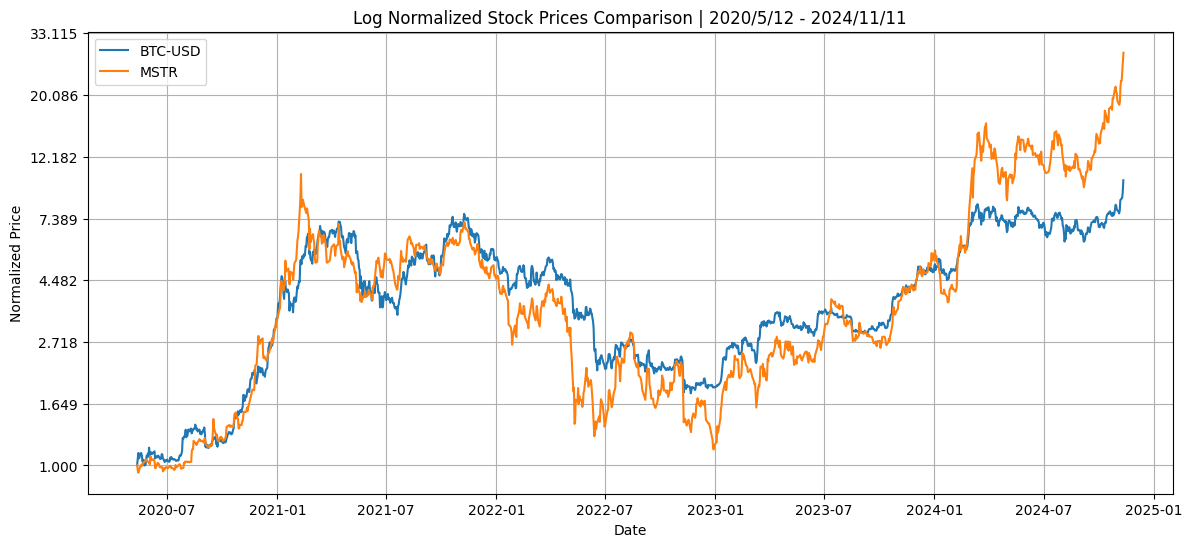

BTC-USD / MSTR correlation:0.86893149


In [20]:
assets = plotting.compare_assets(
    [
        'BTC-USD',
        'MSTR',
    ],
    start_date=[2020, 5, 12],
    end_date=[2024, 11, 12],
    log_scale=True,
)

In [5]:
btc = assets[0][1]
mstr = assets[1][1]

In [15]:
df = pd.DataFrame()
df['BTC'] = btc['Close']
df['MSTR'] = mstr['Close']
df.dropna(inplace=True)
df['Spread'] = df['BTC'] - df['MSTR']

lookback = 100  # Rolling window in days
df['Mean_Spread'] = df['Spread'].rolling(window=lookback).mean()
df['Std_Spread'] = df['Spread'].rolling(window=lookback).std()

# Calculate Z-Score
df['Z_Score'] = (df['Spread'] - df['Mean_Spread']) / df['Std_Spread']

# Drop rows with NaN values (due to rolling calculations)
df.dropna(inplace=True)

df

,BTC,MSTR,Spread,Mean_Spread,Std_Spread,Z_Score
Date,,,,,,
2020-10-01 00:00:00-04:00,"10,575.97",14.90,"10,561.08","10,224.95",969.56,0.35
2020-10-02 00:00:00-04:00,"10,549.33",14.65,"10,534.68","10,237.72",965.09,0.31
2020-10-05 00:00:00-04:00,"10,604.41",14.82,"10,589.59","10,246.39",964.31,0.36
2020-10-06 00:00:00-04:00,"10,668.97",15.00,"10,653.96","10,259.76",960.55,0.41
2020-10-07 00:00:00-04:00,"10,915.69",15.31,"10,900.38","10,275.11",958.38,0.65
...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,"69,359.56",222.99,"69,136.57","62,452.62","4,017.05",1.66
2024-11-05 00:00:00-05:00,"75,639.08",227.80,"75,411.28","62,548.10","4,207.88",3.06
2024-11-06 00:00:00-05:00,"75,904.86",257.81,"75,647.05","62,644.16","4,393.95",2.96


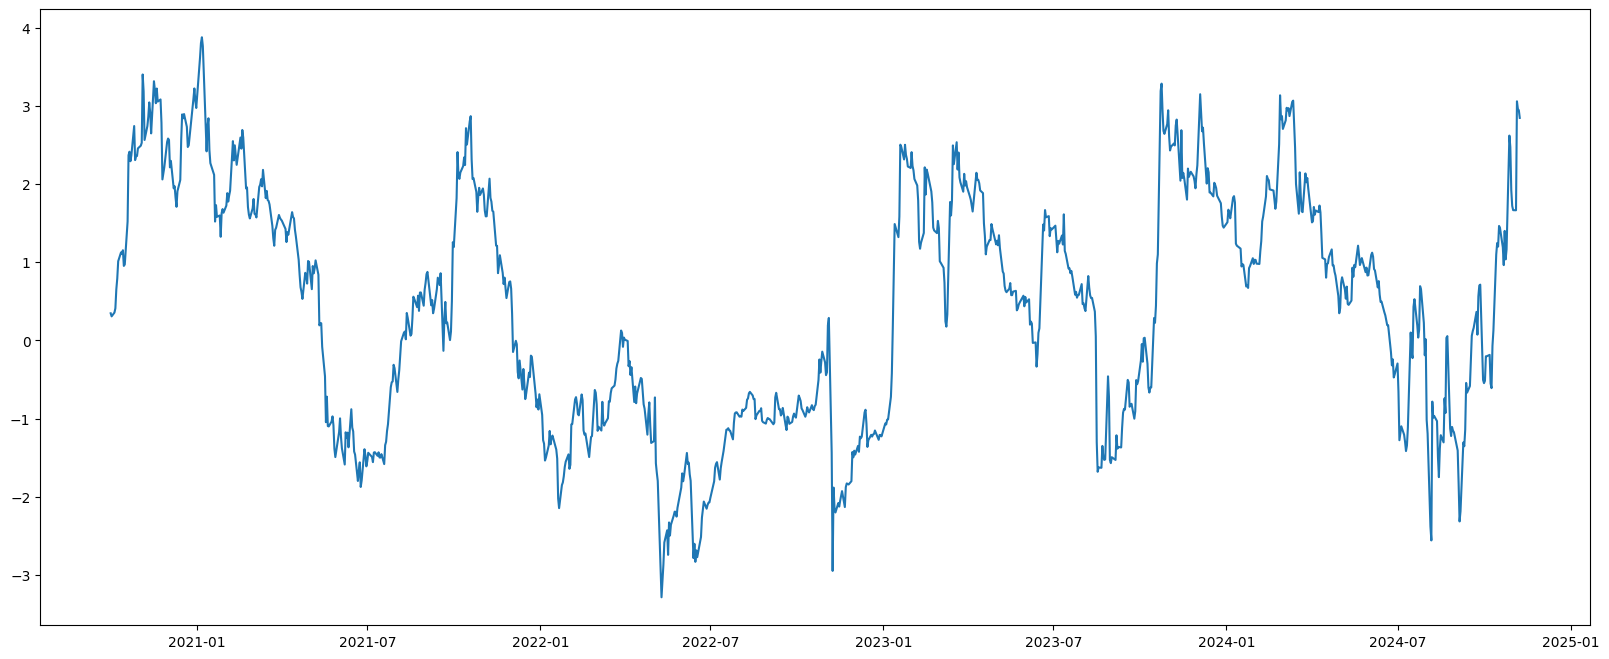

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['Z_Score'])

In [23]:
df[df['Z_Score'] < -3]

,BTC,MSTR,Spread,Mean_Spread,Std_Spread,Z_Score
Date,,,,,,
2022-05-10 00:00:00-04:00,"28,936.36",22.55,"28,913.80","41,544.86","3,846.49",-3.28
2022-05-11 00:00:00-04:00,"29,047.75",16.82,"29,030.93","41,373.72","4,016.71",-3.07
